In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
s2 = 0.1
x = np.linspace(0, 1, N)
y = np.sin(2.5*x) + np.random.normal(0, s2, N)

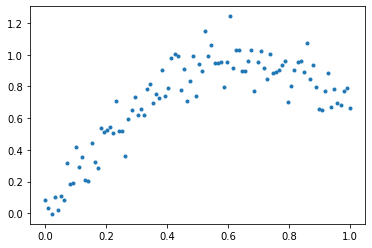

In [3]:
plt.figure()
plt.plot(x, y, '.')
plt.show()

Gonna try to fit a line to this data $$y = kx + \epsilon$$ such that $$P[y | x, k] \sim \mathcal{N}(kx, \sigma^2)$$ But we will assume true $\sigma^2$ known. Computing the negative log-likelihood
$$\Lambda(k) = -2\log \prod_i P[y_i | x_i k] = -2 \sum_i \log_i P[y_i|x_i k]
  = \sum_i \frac{(y_i - kx_i)^2}{\sigma^2} + N \log 2 \pi \sigma^2
$$

**Conclusion:** If noise model parameters (e.g. $\sigma^2$) are known a priori, then underfitting models can be rejected based on their residual values, without having to compare them to other models

In [4]:
def f(x, k):
    return k*x

def gau(y, mu, s2):
    return np.exp(-(y-mu)**2/(2.0*s2)) / np.sqrt(2*np.pi*s2)

def neg_log_likelihood(x,y,k,s2):
    yhat = f(k, x)
    p = gau(yhat, y, s2)
    return -2*np.sum(np.log(p))
    
s2 = 0.1
kLst = np.linspace(0, 10, 50)
nllLst = [neg_log_likelihood(x,y,k,s2) for k in kLst]
minIdx = np.argmin(nllLst)
kMLE = kLst[minIdx]
nllMLE = nllLst[minIdx]

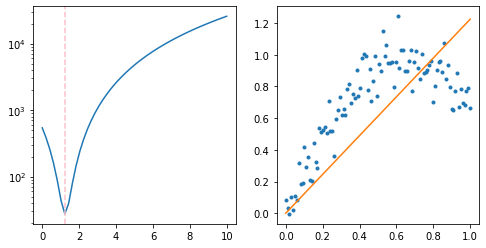

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].semilogy(kLst, nllLst)
ax[0].axvline(x=kMLE, linestyle='--', color='pink')
ax[1].plot(x, y, '.')
ax[1].plot(x, f(x, kMLE))
plt.show()

Accept or reject model based on log-likelihood bootstrap

In [9]:
nllTest = []
for iTest in range(2000):
    #1. Generate data using MLE model
    yTest = f(x, kMLE) + np.random.normal(0, s2, N)
    
    #2. Find neg-log-likelihood
    nllTest += [neg_log_likelihood(x,yTest,kMLE,s2)]    

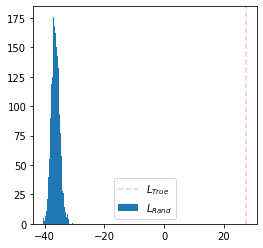

In [14]:
plt.figure(figsize=(4,4))
plt.hist(nllTest, bins='auto', label='$L_{Rand}$')
plt.axvline(x=nllMLE, linestyle='--', color='pink', label='$L_{True}$')
plt.legend()
plt.show()